In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
data= pd.read_csv("Advertising.csv")
data

,id,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
data = data.drop(columns = ['id'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**CORRELATION**

In [8]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


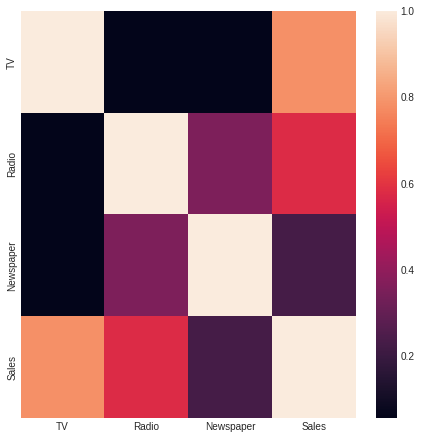

In [9]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(7.5, 7.5))
sns.heatmap(data.corr())
plt.show()

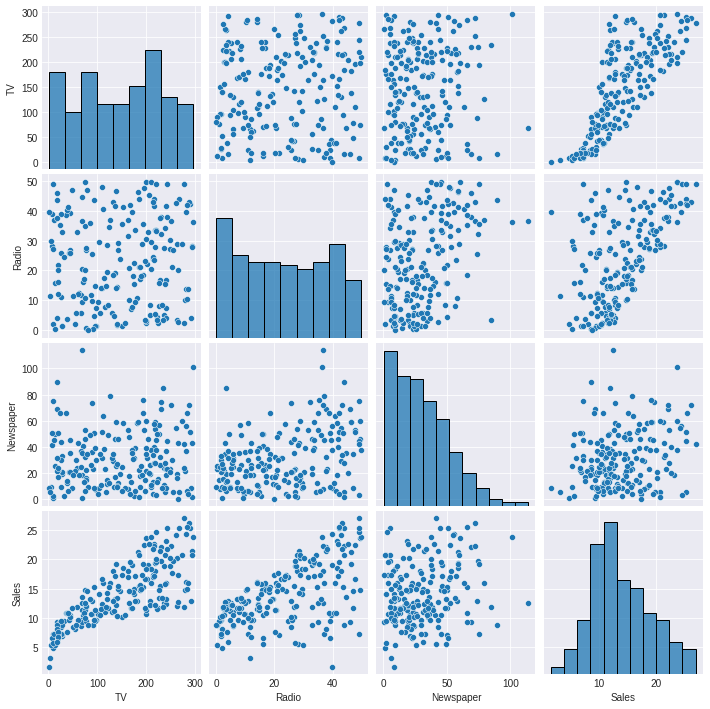

In [10]:
sns.pairplot(data)

**PREPARING DATA**

In [11]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [12]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=9)
X_train.shape


(160, 3)

In [13]:
y_train.shape

(160,)

**LINEAR REGRESSION**

In [14]:
reg= LinearRegression()

In [15]:
reg.fit(X_train, y_train)

LinearRegression()

**MODEL TESTING**

In [16]:
p = reg.predict(X_test)
compare= pd.DataFrame({"y_test":list(y_test), "pred":list(p)})
compare

,y_test,pred
0,21.7,20.767391
1,8.1,5.769906
2,20.2,20.375069
3,19.8,19.704647
4,15.3,15.369490
5,10.9,9.518900
6,21.5,20.435004
7,12.2,11.989022
8,15.2,15.101837
9,21.2,19.910356


**PLOTTING**

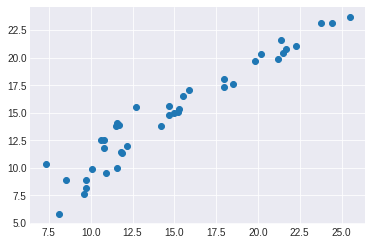

In [17]:
plt.scatter(y_test, p)

In [18]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, p)
print("Mean Absolute error:{}".format(MAE))

MSE = metrics.mean_squared_error(y_test, p)
print('Mean Squared error: {}'.format(np.sqrt(MSE)))

R2 = metrics.r2_score(y_test, p)
print("R2 Score:{}".format(R2))

Mean Absolute error:1.068161812419979
Mean Squared error: 1.3548946741715417
R2 Score:0.9256258465335008


In [19]:
print("THE ACCURACY IS:",int(R2*100),"%")

THE ACCURACY IS: 92 %
